In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
%matplotlib inline

In [28]:
np.random.seed(42)

In [29]:
os.makedirs("./images", exist_ok=True)

In [30]:
# In order to save figures

def save_fig(fig_id, resolution=300):
    path = os.path.join("./images", fig_id + ".png")
    print("Saving figure", fig_id)
    plt.savefig(path, format="png", dpi=resolution)

In [40]:
# Creating the data

m = 100

X = 2* np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

Saving figure generated_data_plot


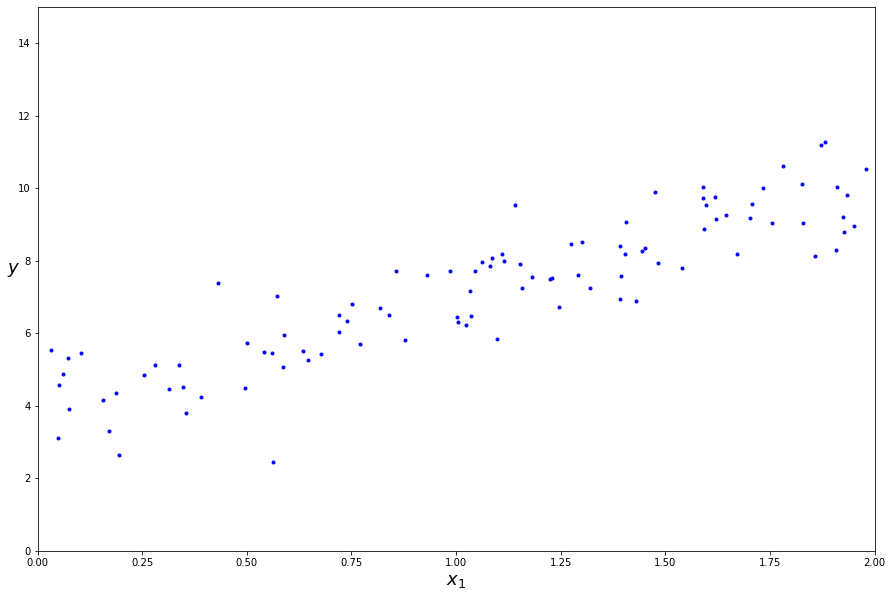

In [41]:
# Plotting the created data

plt.figure(figsize=(15,10))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [42]:
# Adding the bias term to the data

X_b = np.c_[np.ones((m, 1)), X]

In [43]:
# Creating new data to check predictions

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

## Using scikit-learn

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [45]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

## using batch gradient descent

In [ ]:
eta = 0.1
n_iterations = 1000

theta = np.random.randn(2,1) # Random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients